# 1.3.1.4 Regression Model Comparison
## OLS Regression vs. KNN Regression
### Sam Fradkin

In [26]:
%%HTML
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton"
value="Show Code"></form>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline
pd.options.display.float_format = '{:.0f}'.format

from sklearn import linear_model
import math
import scipy.stats
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

## 1) Import the data

In [4]:
data = pd.read_csv("FBI Crime Data - CA 2017.csv")
data.head()

,State,Population,Violent crime,Murder and nonnegligent manslaughter,Rape1,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson
0,Adelanto,33693,238,2,28,48,160,578.0,190,290.0,98,13
1,Agoura Hills,20814,16,0,2,4,10,278.0,71,187.0,20,4
2,Alameda,79761,253,0,16,133,104,2347.0,219,1725.0,403,25
3,Albany,19880,36,0,1,28,7,523.0,77,383.0,63,3
4,Alhambra,85865,172,4,17,89,62,1877.0,363,1244.0,270,12


## 2) Analyze and clean the data

In [8]:
# Check what types of data we are dealing with
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 12 columns):
City              461 non-null object
Population        461 non-null int64
Violent Crime     461 non-null int64
Murder            461 non-null int64
Rape              461 non-null int64
Robbery           461 non-null int64
Agg Assault       461 non-null int64
Property Crime    461 non-null float64
Burglary          461 non-null int64
Larceny           461 non-null float64
Vehicle Theft     461 non-null int64
Arson             461 non-null int64
dtypes: float64(2), int64(9), object(1)
memory usage: 43.3+ KB


In [7]:
# Data cleaning

# Rename columns
data.columns = ['City','Population','Violent Crime', 'Murder', 'Rape', 'Robbery', 'Agg Assault', 'Property Crime',
               'Burglary', 'Larceny', 'Vehicle Theft', 'Arson']

cols = ['Population', 'Violent Crime', 'Murder', 'Rape', 'Robbery', 'Agg Assault', 'Property Crime',
        'Burglary', 'Larceny', 'Vehicle Theft', 'Arson']

# Replace all NaN with 0
data[cols] = data[cols].replace(np.nan, 0)

## 3) Analyze Features

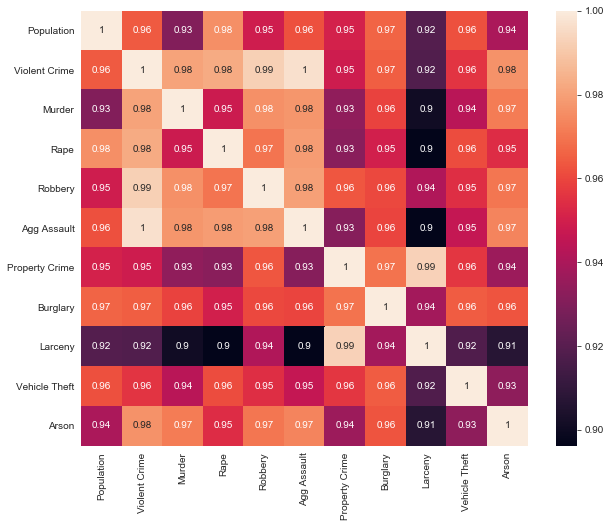

In [21]:
# Create a heatmap of feature correlations
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

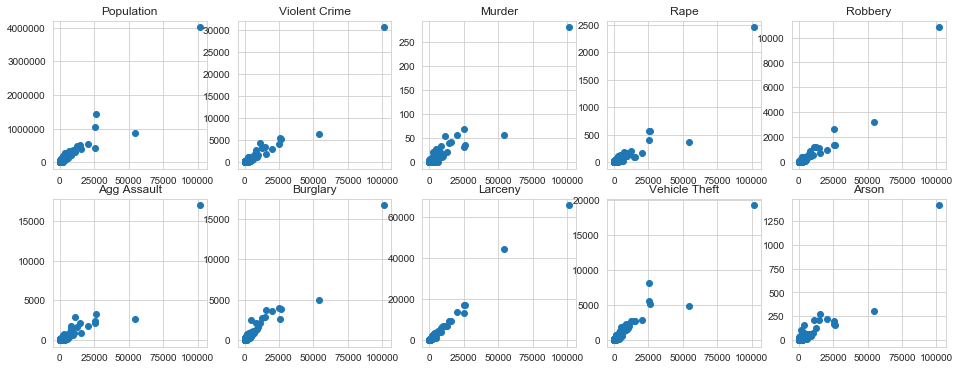

In [23]:
# Create a variable called 'outcome' to compare with all the other features
outcome = data['Property Crime']

plt.figure(figsize=(16,6))

#Population
plt.subplot(2, 5, 1)
plt.scatter(outcome, data['Population'])
plt.title('Population')

#Violent Crime
plt.subplot(2, 5, 2)
plt.scatter(outcome, data['Violent Crime'])
plt.title('Violent Crime')

#Murder
plt.subplot(2, 5, 3)
plt.scatter(outcome, data['Murder'])
plt.title('Murder')

#Rape1
plt.subplot(2, 5, 4)
plt.scatter(outcome, data['Rape'])
plt.title('Rape')

#Robbery
plt.subplot(2, 5, 5)
plt.scatter(outcome, data['Robbery'])
plt.title('Robbery')

#Aggravated Assault
plt.subplot(2, 5, 6)
plt.scatter(outcome, data['Agg Assault'])
plt.title('Agg Assault')

#Burglary
plt.subplot(2, 5, 7)
plt.scatter(outcome, data['Burglary'])
plt.title('Burglary')

#Larceny
plt.subplot(2, 5, 8)
plt.scatter(outcome, data['Larceny'])
plt.title('Larceny')

#Vehicle Theft
plt.subplot(2, 5, 9)
plt.scatter(outcome, data['Vehicle Theft'])
plt.title('Vehicle Theft')

#Arson
plt.subplot(2, 5, 10)
plt.scatter(outcome, data['Arson'])
plt.title('Arson')
 
plt.show()

## 4) Use OLS Regression model

In [30]:
# Instantiate and fit the model using four different features - Population, Rape2, Robbery, and Agg Assault.
regr = linear_model.LinearRegression()
Y = data['Property Crime'].values.reshape(-1, 1)
X = data[['Population', 'Murder', 'Rape', 'Agg Assault']]
regr.fit(X, Y)

print('Coefficients: \n', regr.coef_)
print('\nIntercept:  \n', regr.intercept_)
print('\nR-Squared:')
print((regr.score(X, Y) * 100).round(3),'%')

Coefficients: 
 [[ 2.39224990e-02  2.89403704e+02 -2.50227380e+00 -3.83815902e+00]]

Intercept:  
 [-5.89263976]

R-Squared:
92.977 %


Our OLS Regression model turned out great!<br><br>
__Intercept:__ -5.893<br>
__R-Squared:__  92.977%<br><br>
Use __GridSearchCV__ from __sklearn__ to see how it holds up with folds:

In [33]:
from sklearn.model_selection import GridSearchCV

# Instantiate and fit our model
regr = linear_model.LinearRegression()

parameters = {'normalize':[True,False]}

grid = GridSearchCV(regr, parameters, scoring='r2', cv=5, verbose=1)

# Bring in the features to use
Y = data['Property Crime'].values.reshape(-1,1)
X = data[['Population', 'Murder', 'Rape', 'Agg Assault']]

# Fit the data
grid.fit(X, Y)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'normalize': [True, False]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='r2', verbose=1)

In [35]:
grid.cv_results_

{'mean_fit_time': array([0.00873561, 0.00216613]),
 'std_fit_time': array([0.01248993, 0.0007625 ]),
 'mean_score_time': array([0.00126324, 0.00090499]),
 'std_score_time': array([0.00060862, 0.00026435]),
 'param_normalize': masked_array(data=[True, False],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'normalize': True}, {'normalize': False}],
 'split0_test_score': array([0.81936579, 0.81936579]),
 'split1_test_score': array([0.92017397, 0.92017397]),
 'split2_test_score': array([0.86203107, 0.86203107]),
 'split3_test_score': array([0.76204441, 0.76204441]),
 'split4_test_score': array([0.70834768, 0.70834768]),
 'mean_test_score': array([0.81440337, 0.81440337]),
 'std_test_score': array([0.07404106, 0.07404106]),
 'rank_test_score': array([1, 2], dtype=int32),
 'split0_train_score': array([0.9317983, 0.9317983]),
 'split1_train_score': array([0.92973698, 0.92973698]),
 'split2_train_score': array([0.84355251, 0.84355251]),
 'sp

In [34]:
# Get the R-Squared value after using GridSearchCV 
print("R-Squared: ", ((grid.score(X, Y)) * 100).round(3), "%")

R-Squared:  92.977 %


## 5) Use KNN Regression model

__Unweighted Version__

In [45]:
from sklearn import neighbors

# Build our model
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = data[['Population', 'Murder', 'Rape', 'Agg Assault']]
Y = data['Violent Crime']
knn.fit(X, Y)

#Set up our prediction line
T = np.c_[np.random.randint(10000,2000000,100), np.random.randint(0,1000,100), np.random.randint(0,1000,100), 
          np.random.randint(0,100000,100)]

Y_ = knn.predict(T)

__Weighted Version__

In [46]:
# Build our model
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = data[['Population', 'Murder', 'Rape', 'Agg Assault']]
Y = data['Violent Crime']
knn_w.fit(X, Y)

#Set up our prediction line
T = np.c_[np.random.randint(10000,2000000,100), np.random.randint(0,1000,100), np.random.randint(0,1000,100), 
          np.random.randint(0,100000,100)]

Y_ = knn_w.predict(T)

__Cross-Validation Scores__

In [47]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(knn, X, Y, cv=5)
print('Unweighted Accuracy: %0.2f (+/- %0.2f)' % (score.mean(), score.std() * 2))

score_w = cross_val_score(knn_w, X, Y, cv=5)
print('Weighted Accuracy:   %0.2f (+/- %0.2f)' % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.50 (+/- 0.39)
Weighted Accuracy:   0.49 (+/- 0.36)


## 6) Summary

To recap, the models produced the following scores:<br><br>

__------OLS REGRESSION------__<br>
__Intercept:__ &nbsp;&nbsp;&nbsp; -5.893<br>
__R-Squared:__  &nbsp; 92.977%<br><br>

__------KNN REGRESSION------__<br>
__Unweighted:__  &nbsp;&nbsp; 50% (+/- 0.39)<br>
__Weighted:__   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 49% (+/- 0.36)<br><br>

The OLS Regression Model performed significantly better than the KNN Regression model. I believe that for regression modelling, OLS has a better accuracy potential than KNN Regression. I believe this occurs due to the fact that the OLS regression model uses all datapoints to create a line of best fit, whereas KNN uses only a specific few datapoints to generate a prediction. This means if the datapoint you are attempting to predict happens to fall closest to some outliers, the prediction is likely to follow suit, whereas with OLS, the outliers and merely part of the overall algorithm for the regression line.<br><br>

While KNN might happen to produce somewhat accurate results some of the time, I would be wary of using KNN as my sole regression modeling tool due to a lack of trust in its capabilites. I am much more likely to use KNN as a classifier than a regression modeling tool.<br><br>

It is possible, however, that if the data being used here in this example was not so highly cross-correlated, KNN Regression might have some stronger prediction capabilities. However, that is not the case in this scenario.